<a href="https://colab.research.google.com/github/Prebor97/prebor_haggai/blob/main/PreborTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

In [ ]:
df.head(2)

,Month,Passengers
0,1949-01,112
1,1949-02,118


In [ ]:
# convert the month to date time
df['Month']= pd.to_datetime(df['Month'])
# After that, we will now turn the 'months' column as index(locations)
df.set_index('Month', inplace = True)

Text(0, 0.5, 'Passengers')

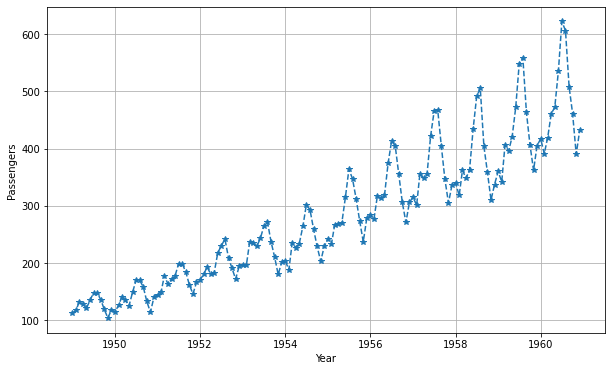

In [ ]:
# Time to visualize our data
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Passengers, '--', marker = '*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [ ]:
# Next is to check for missing values which i doubt there would be any
df.isnull().values.any()

False

In [ ]:
# Now i want to create my own missing values so i can practice how to go about it by making a copy of our dataset and deleting some values from it randomly
df_copy = df.copy()

In [ ]:
rows = df_copy.sample(frac = 0.1, random_state = 0)
rows['Passengers'] = np.nan
df_copy.loc[rows.index, 'Passengers'] = rows['Passengers']

In [ ]:
df_copy.isnull().sum()

Passengers    14
dtype: int64

Now it's time to practice cleaning of the data

In [ ]:
# Filling by imputation - forward fill
df_copy_ffill = df_copy.fillna(method = 'ffill')
df_copy_ffill.isnull().sum()

Passengers    0
dtype: int64

In [ ]:
df_copy_ffill.head(2)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0


In [ ]:
# Using backward fill(imputation)
df_copy_bfill = df_copy.fillna(method = 'bfill')

In [ ]:
# Filling missing values by interpolation
df_copy_fint = df_copy.interpolate(method = 'linear', limit_direction = 'forward')
df_copy_bint = df_copy.interpolate(method = 'linear', limit_direction = 'backward')

In [ ]:
df_copy_fint.isnull().sum()

Passengers    0
dtype: int64

In [ ]:
df_copy_bint.isnull().sum()

Passengers    0
dtype: int64

In [ ]:
df.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


We are going to down sample now

In [ ]:
df_quart.head(10)

,Passengers
Month,
1949-01-31,112.000000
1949-04-30,126.333333
1949-07-31,134.666667
1949-10-31,134.333333
1950-01-31,112.333333
1950-04-30,134.000000
1950-07-31,148.000000
1950-10-31,153.666667
1951-01-31,133.000000


Text(0, 0.5, 'Passengers')

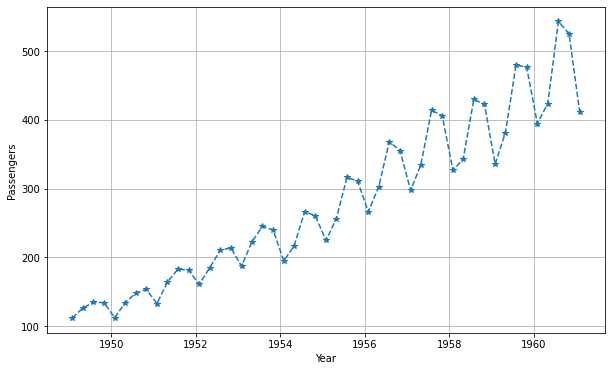

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_quart.index, df_quart.Passengers, '--', marker = '*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

Time to up sample

In [ ]:
df_daily = df.resample('D').mean()

Text(0, 0.5, 'Passengers')

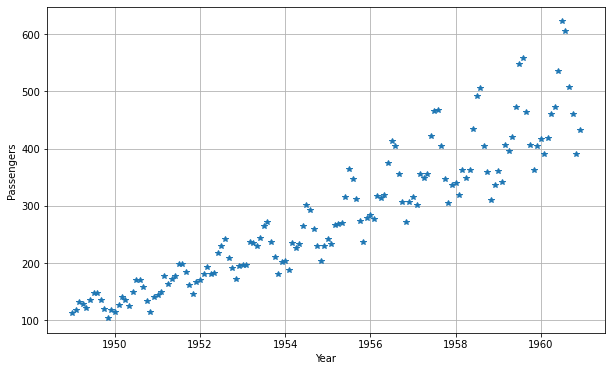

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.Passengers, '--', marker = '*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

We want to use moving average to cancel out noise

In [ ]:
df_MA = df.copy()

In [ ]:
MA = df_MA['Passengers'].rolling(6).mean()

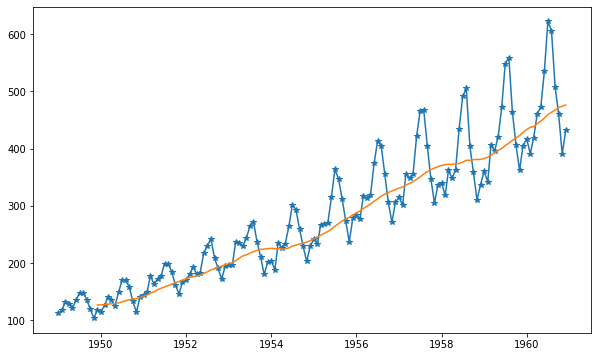

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_MA.index, df_MA.Passengers, '-', marker = '*')
plt.plot(df_MA.rolling(12).mean())

I have a problem with visualizing moving average

Time series exploratory data analysis

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import statsmodels.api as sm

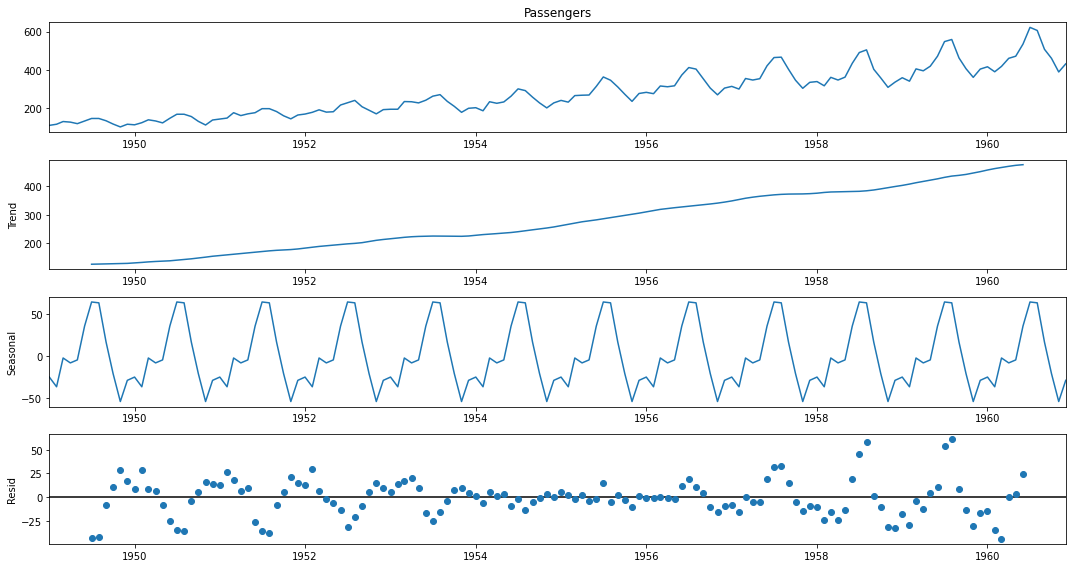

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model = 'additive')
decompose_series.plot()
plt.show()

We can see obviously from the summary graphs that it has a trend(upward), but just to be sure, we carry out the adfullers test

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['Passengers'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

ADF Statistic: 0.8153688792060472
p-value: 0.991880243437641
No. of lags used: 13
No. of observations used : 130
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


The **p** value is greater than the critical value at 5% and the *ADF statistics* is greater than all the critical values. We can now confirm mathematically that there is trend in the data meaning it is non stationary. For any time series prediction to be done, the data needs to be stationary.  So the preceding steps turns the data to a stationary data.

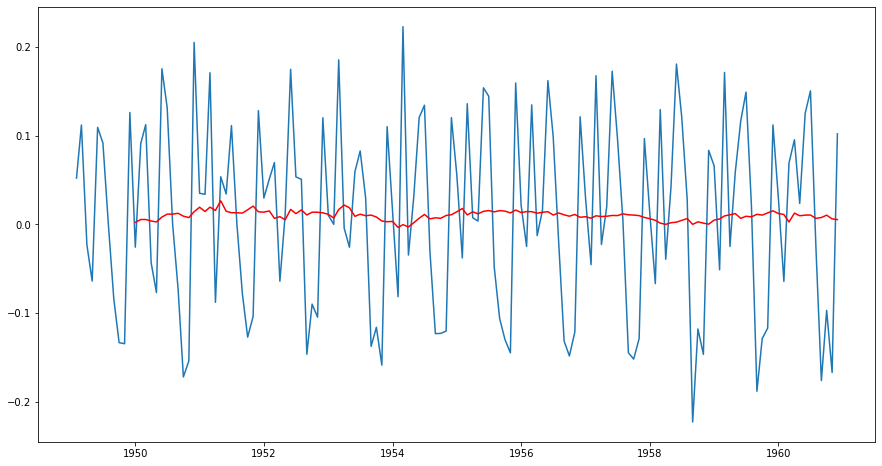

In [ ]:
df_log = np.log(df) #Transformation
df_diff = df_log.diff(periods=1) # Differencing
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.plot(df_diff.rolling(12).mean(), color='red')

Now to make prediction using arma, arima and sarima.

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

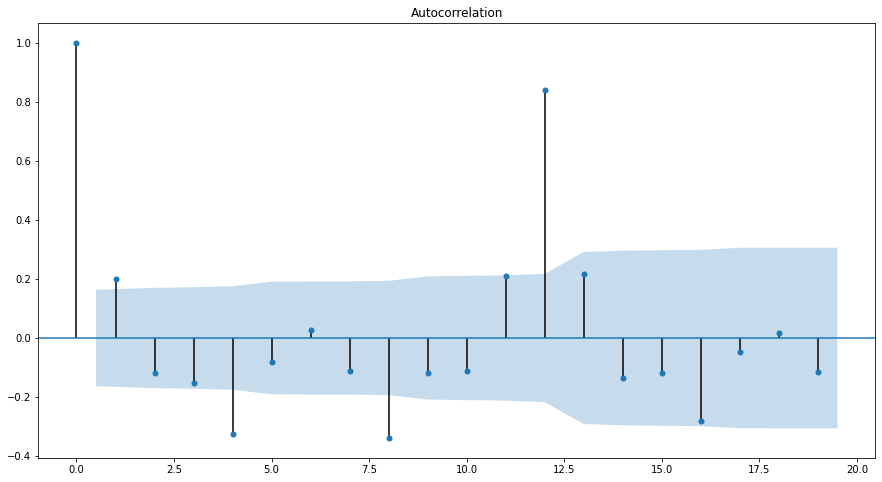

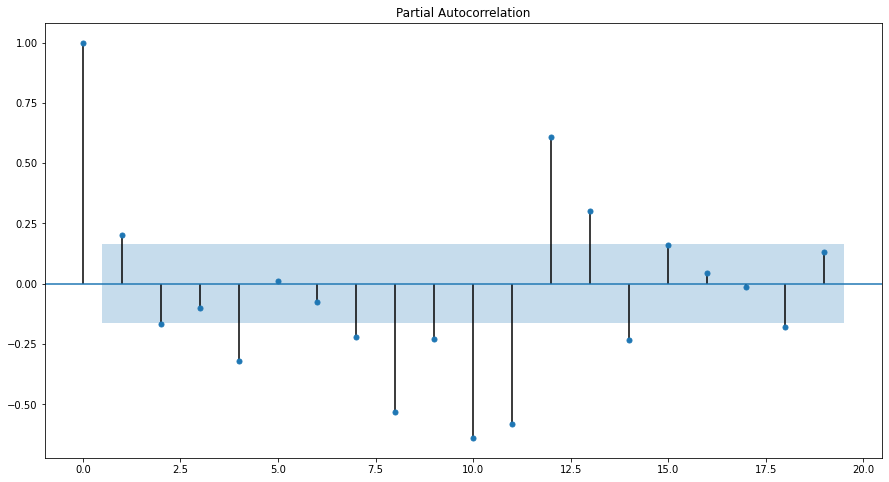

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df_diff = df_diff.fillna(method = 'bfill')
#ACF
plot_acf(df_diff, lags = range(0, 20))
plt.show()
#PACF
plot_pacf(df_diff, lags = range(0, 20))
plt.show()

Note that ACF is q while PACF is q

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

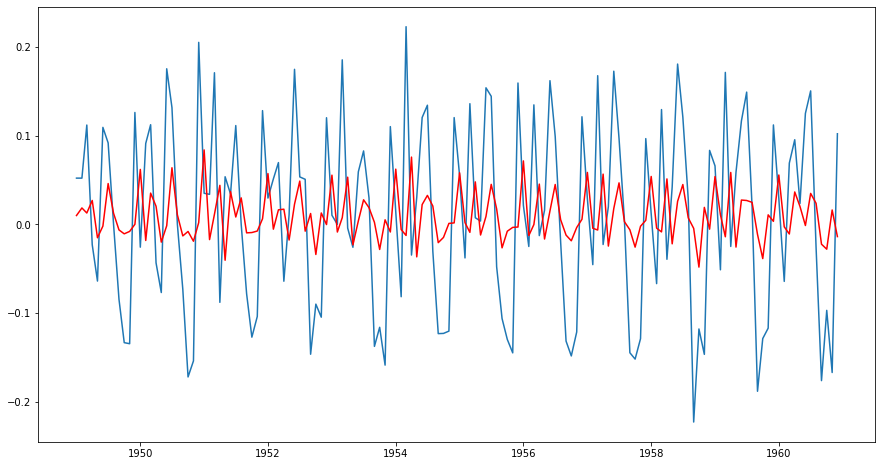

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
#(p,d,q) using the auto regressive model
AR_model = ARIMA(df_diff, order=(2,0,0))
AR_model_results = AR_model.fit()
plt.plot(df_diff)
plt.plot(AR_model_results.fittedvalues, color='red')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


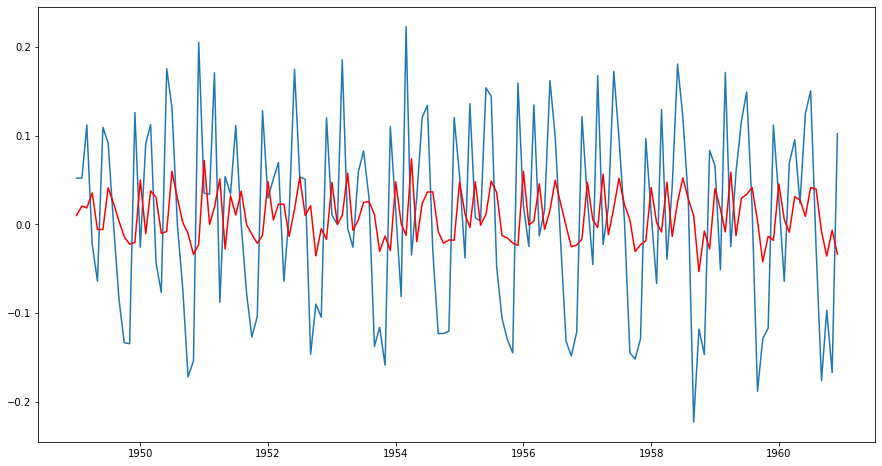

In [ ]:
#(p,d,q) using the moving average model
MA_model = ARIMA(df_diff, order=(0,0,1))
MA_model_results = MA_model.fit()
plt.plot(df_diff)
plt.plot(MA_model_results.fittedvalues, color='red')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


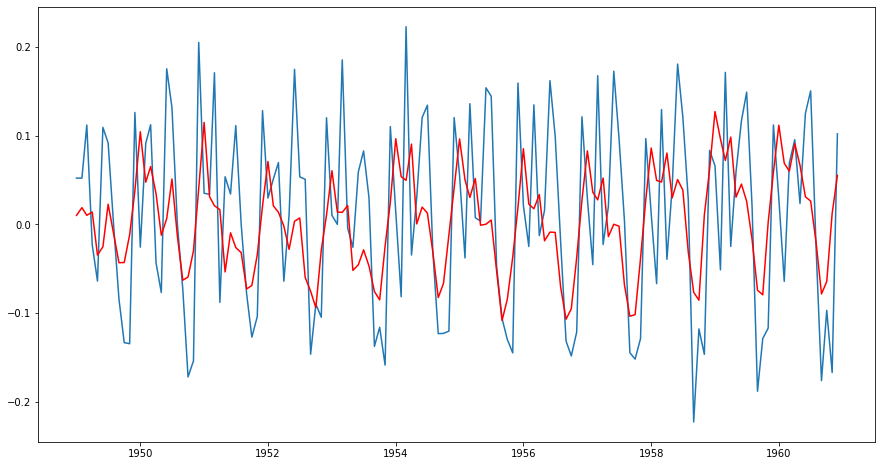

In [ ]:
#(p,d,q) using the moving average and auto regressive model
ARIMA_model = ARIMA(df_diff, order=(2,0,1))
ARIMA_model_results = ARIMA_model.fit()
plt.plot(df_diff)
plt.plot(ARIMA_model_results.fittedvalues, color='red')

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 1.2 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638163 sha256=a22864afe73aba1507765c02c9de0c4c0b9b6073ba6e88d981e7c76e7b68fb53
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [ ]:
from fbprophet import Prophet

I want to use fbprophet to make forecast for the next 11 months

In [ ]:
df1 = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

In [ ]:
df1['Month']= pd.to_datetime(df1['Month'])

In [ ]:
df1 = df1.rename(columns = {'Month': 'ds', 'Passengers' : 'y'})
df1.head(2)

,ds,y
0,1949-01-01,112
1,1949-02-01,118


In [ ]:
model = Prophet()
model.fit(df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods = 11, freq = 'M')
forecast = model.predict(future) 
forecast.head()


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,1949-01-01,84.807353,55.877454,111.127963,106.727984,106.727984,106.727984
1,1949-02-01,78.218354,48.082126,105.826234,108.901201,108.901201,108.901201
2,1949-03-01,110.361397,82.559596,137.519304,110.864107,110.864107,110.864107
3,1949-04-01,107.851823,78.140582,135.945918,113.037323,113.037323,113.037323
4,1949-05-01,111.351735,81.138543,141.334655,115.140437,115.140437,115.140437
...,...,...,...,...,...,...,...
150,1961-06-30,577.062353,549.474410,607.344231,505.571811,505.366846,505.811078
151,1961-07-31,575.495626,547.076400,604.908554,508.685754,508.427506,508.999849
152,1961-08-31,529.069236,500.846649,560.434261,511.799697,511.490497,512.184470
153,1961-09-30,492.301306,461.131992,520.475038,514.813190,514.435617,515.275287


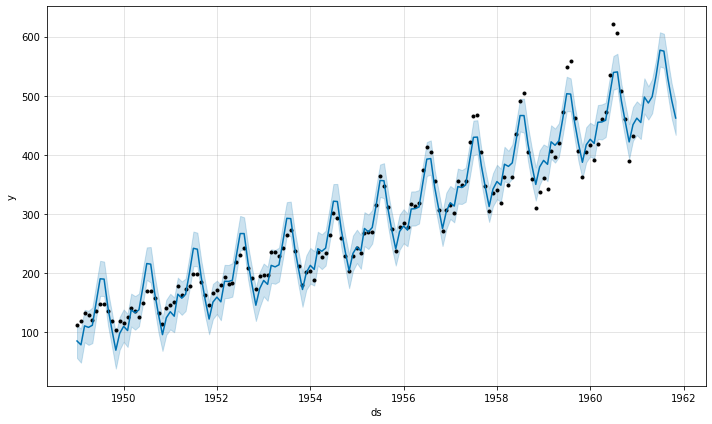

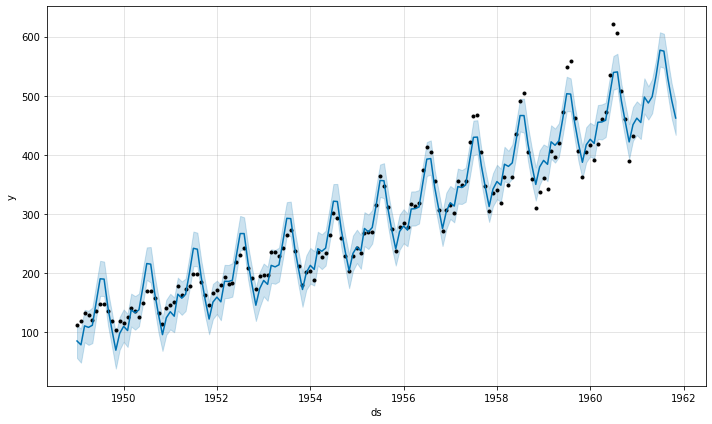

In [ ]:
model.plot(forecast)

Text(0, 0.5, 'Passengers')

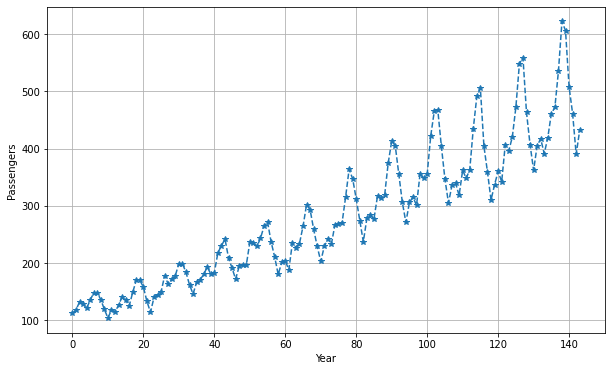

In [ ]:
# Time to visualize our data
plt.figure(figsize=(10,6))
plt.plot(df1.index, df1.y, '--', marker = '*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')